<a href="https://colab.research.google.com/github/UzairYasin/langgraph/blob/main/langgraph_basic_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture --no-stderr
%pip install --quiet -U langgraph-checkpoint-sqlite langchain_core langsmith langgraph langchain_google_genai

In [2]:
from google.colab import userdata
import os

GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')
os.environ["LANGCHAIN_API_KEY"] = userdata.get('LANGCHAIN_API_KEY')
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "langchain-academy"

In [15]:
from typing import Annotated
from langgraph.graph.message import add_messages
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

class State(TypedDict):
  messages: Annotated[list, add_messages]

Adding LLM and node

In [16]:
from langchain_google_genai import ChatGoogleGenerativeAI
from IPython.core.display import Markdown

llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    api_key= GEMINI_API_KEY,
    temperature=0.2
    )

def chatbot(state:State):

  return {"messages": [llm.invoke(state["messages"])]}

Building Graph

In [17]:
graph_builder = StateGraph(State)

graph_builder.add_node('chatbot', chatbot)
graph_builder.add_edge(START, 'chatbot')
graph_builder.add_edge('chatbot', END)

graph = graph_builder.compile()

Building graph image

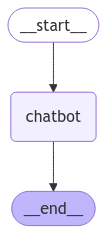

In [18]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [25]:
def stream_graph_updates(user_input: str):
  for event in graph.stream({"messages": [("user", user_input)]}):
      for value in event.values():
          print("Assistant:", value["messages"][-1].content)

In [26]:
while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User: hi
Assistant: Hi there! How can I help you today?

User: my name is khalid
Assistant: It's nice to meet you, Khalid.

User: i live in california
Assistant: That's great!  California is a beautiful and diverse state.  Is there anything specific you'd like to talk about regarding California?  For example, are you looking for information about a particular city, region, activity, or something else?

User: what was my name?
Assistant: I do not have access to personal information about you, including your name.  I have no memory of past conversations.

User: whats my name
Assistant: I do not know your name. I have no access to personal information about you unless you explicitly provide it to me.

User: how can i add memory in my langraph chatbot, give short response
Assistant: LangChain offers several memory options.  Use a `ConversationBufferMemory` for simple short-term memory or a more advanced `ConversationSummaryMemory` for summarizing past interactions.  You can also integrate 